In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy
import mlxtend
from matplotlib.pyplot import MultipleLocator
import math

# 1.对数据集进行处理，转换成适合进行关联规则挖掘的形式

In [3]:
os.chdir(r'C:\Users\ma\archive')
wines = pd.read_csv('winemag-data-130k-v2.csv', sep=',', encoding="utf-8")
wines.columns = ["","country","description","designation","points","price",
                 "province","region_1","region_2","taster_name","taster_twitter_handle","title","variety","winery"]
wines.drop("",axis=1,inplace = True)
wines.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
def five_point(box:list):
    print("min:"+str(box.quantile(0)))
    print("Q1:"+str(box.quantile(0.25)))
    print("median:"+str(box.quantile(0.5)))
    print("Q3:"+str(box.quantile(0.75)))
    print("max:"+str(box.quantile(1)))

In [5]:
wines.dropna(subset = ["points","price","province","variety"], inplace = True)

In [6]:
wines_1 = wines[["points","price","province","variety"]]

In [7]:
five_point(wines_1.points)
five_point(wines_1.price)

min:80.0
Q1:86.0
median:88.0
Q3:91.0
max:100.0
min:4.0
Q1:17.0
median:25.0
Q3:42.0
max:3300.0


In [8]:
wines_2 = wines_1.copy(deep =True)
score = ["[80,86)","[86,88)","[88,91)","[91,100]"]
price = ["[4,17)","[17,25)","[25,42)","[42,3300]"]
wines_2.points = pd.qcut(wines_2.points,4) 
wines_2.price = pd.qcut(wines_2.price,4)

In [9]:
wines_2.points = "point:"+wines_2.points.astype(str)
wines_2.price = "price:"+wines_2.price.astype(str)
wines_2.head()

,points,price,province,variety
1,"point:(86.0, 88.0]","price:(3.999, 17.0]",Douro,Portuguese Red
2,"point:(86.0, 88.0]","price:(3.999, 17.0]",Oregon,Pinot Gris
3,"point:(86.0, 88.0]","price:(3.999, 17.0]",Michigan,Riesling
4,"point:(86.0, 88.0]","price:(42.0, 3300.0]",Oregon,Pinot Noir
5,"point:(86.0, 88.0]","price:(3.999, 17.0]",Northern Spain,Tempranillo-Merlot


In [10]:
tuples = [list(x) for x in wines_2.values]
se = pd.Series(tuples)
se

0         [point:(86.0, 88.0], price:(3.999, 17.0], Dour...
1         [point:(86.0, 88.0], price:(3.999, 17.0], Oreg...
2         [point:(86.0, 88.0], price:(3.999, 17.0], Mich...
3         [point:(86.0, 88.0], price:(42.0, 3300.0], Ore...
4         [point:(86.0, 88.0], price:(3.999, 17.0], Nort...
                                ...                        
120910    [point:(88.0, 91.0], price:(25.0, 42.0], Mosel...
120911    [point:(88.0, 91.0], price:(42.0, 3300.0], Ore...
120912    [point:(88.0, 91.0], price:(25.0, 42.0], Alsac...
120913    [point:(88.0, 91.0], price:(25.0, 42.0], Alsac...
120914    [point:(88.0, 91.0], price:(17.0, 25.0], Alsac...
Length: 120915, dtype: object

# 2.找出频繁模式

In [11]:
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder 
te = TransactionEncoder()
X =te.fit_transform(tuples)
colmns = te.columns_
df = pd.DataFrame(X,columns=colmns)
df.astype(np.uint8)

,Abouriou,Achaia,Aconcagua Costa,Aconcagua Valley,Aegean,Agiorgitiko,Agioritikos,Aglianico,Ahr,Aidani,...,"price:(17.0, 25.0]","price:(25.0, 42.0]","price:(3.999, 17.0]","price:(42.0, 3300.0]",Çalkarası,Österreichischer Perlwein,Österreichischer Sekt,Štajerska,Žilavka,Župa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120910,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
120911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
120912,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
120913,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
result =apriori(df,min_support=0.05,use_colnames=True)
result

,support,itemsets
0,0.077608,(Cabernet Sauvignon)
1,0.298590,(California)
2,0.091610,(Chardonnay)
3,0.105735,(Pinot Noir)
4,0.070016,(Red Blend)
5,0.070984,(Washington)
6,0.268544,"(point:(79.999, 86.0])"
7,0.262705,"(point:(86.0, 88.0])"
8,0.299541,"(point:(88.0, 91.0])"
9,0.169210,"(point:(91.0, 100.0])"


In [13]:
result.sort_values(by='support',ascending=False,inplace=True)
result

,support,itemsets
8,0.299541,"(point:(88.0, 91.0])"
1,0.298590,(California)
6,0.268544,"(point:(79.999, 86.0])"
7,0.262705,"(point:(86.0, 88.0])"
12,0.262077,"(price:(3.999, 17.0])"
11,0.247918,"(price:(25.0, 42.0])"
13,0.245635,"(price:(42.0, 3300.0])"
10,0.244370,"(price:(17.0, 25.0])"
9,0.169210,"(point:(91.0, 100.0])"
24,0.144837,"(point:(79.999, 86.0], price:(3.999, 17.0])"


In [14]:
result_2 = result[result["itemsets"].map(len)>=2]
result_2_1 = result[result["itemsets"].map(len)==1]
result_2

,support,itemsets
24,0.144837,"(point:(79.999, 86.0], price:(3.999, 17.0])"
31,0.112616,"(price:(42.0, 3300.0], point:(91.0, 100.0])"
29,0.100765,"(price:(25.0, 42.0], point:(88.0, 91.0])"
20,0.095613,"(California, price:(25.0, 42.0])"
21,0.095538,"(California, price:(42.0, 3300.0])"
17,0.085879,"(California, point:(88.0, 91.0])"
30,0.085738,"(price:(42.0, 3300.0], point:(88.0, 91.0])"
25,0.085068,"(point:(86.0, 88.0], price:(17.0, 25.0])"
27,0.081975,"(point:(86.0, 88.0], price:(3.999, 17.0])"
15,0.079668,"(California, point:(79.999, 86.0])"


In [15]:
link = [list(x) for x in result_2.itemsets]
link_1 = [list(x) for x in result_2_1.itemsets]
linkstr = [" , ".join(x) for x in link]
linkstr_1 = ["".join(x) for x in link_1]
linkstr

['point:(79.999, 86.0] , price:(3.999, 17.0]',
 'price:(42.0, 3300.0] , point:(91.0, 100.0]',
 'price:(25.0, 42.0] , point:(88.0, 91.0]',
 'California , price:(25.0, 42.0]',
 'California , price:(42.0, 3300.0]',
 'California , point:(88.0, 91.0]',
 'price:(42.0, 3300.0] , point:(88.0, 91.0]',
 'point:(86.0, 88.0] , price:(17.0, 25.0]',
 'point:(86.0, 88.0] , price:(3.999, 17.0]',
 'California , point:(79.999, 86.0]',
 'price:(17.0, 25.0] , point:(88.0, 91.0]',
 'point:(86.0, 88.0] , California',
 'price:(17.0, 25.0] , point:(79.999, 86.0]',
 'California , point:(91.0, 100.0]',
 'California , price:(17.0, 25.0]',
 'point:(86.0, 88.0] , price:(25.0, 42.0]',
 'Pinot Noir , California',
 'Pinot Noir , price:(42.0, 3300.0]']

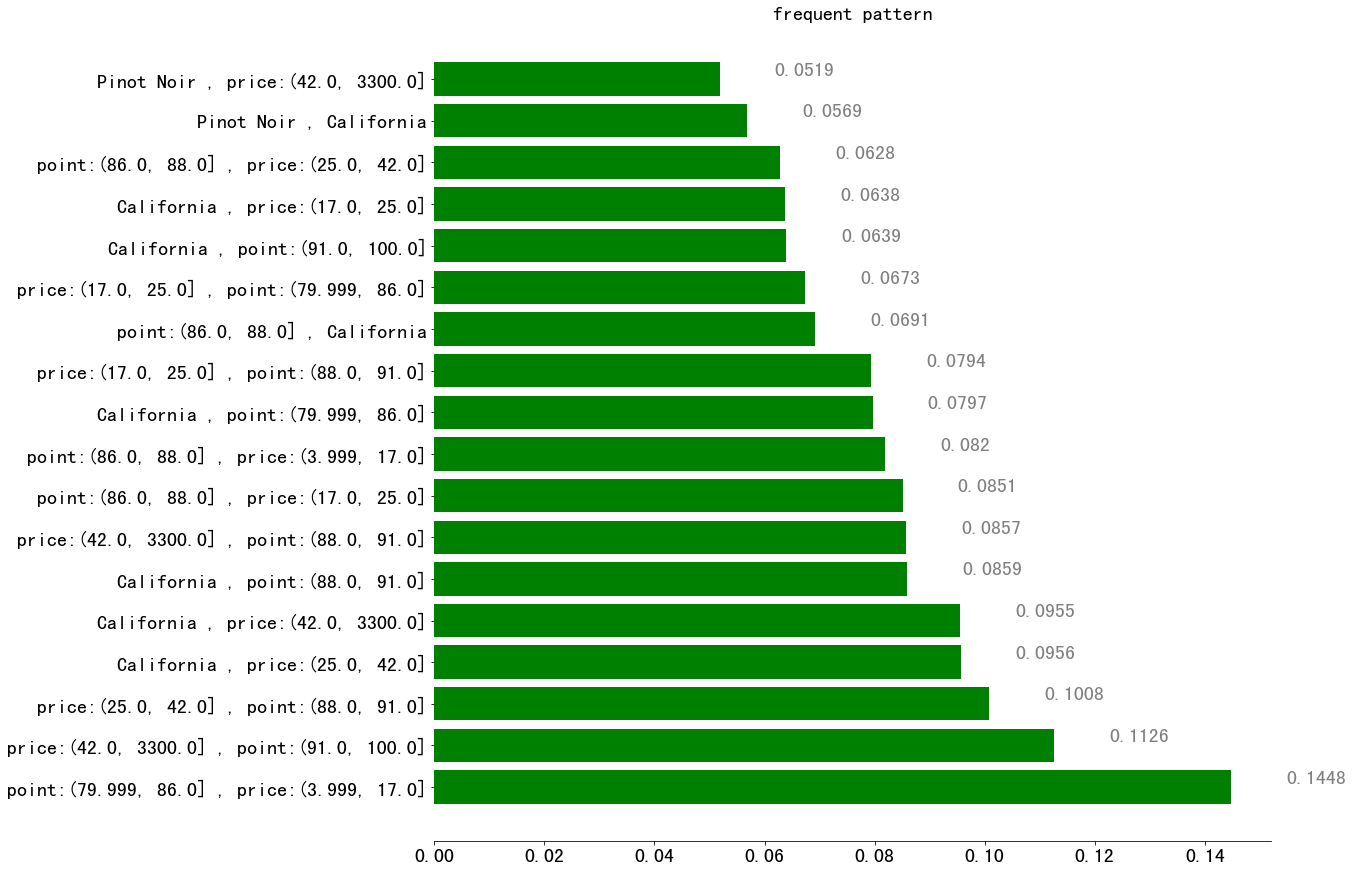

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))
colors = ['g' for i in range(len(result_2.index))]
ax.barh(y=linkstr,width=result_2.support, color = colors)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('frequent pattern',fontsize = 20)
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False) 

for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5, 
             str(round((i.get_width()), 4)), 
             fontsize=20, fontweight='bold', 
             color='grey')
plt.show()

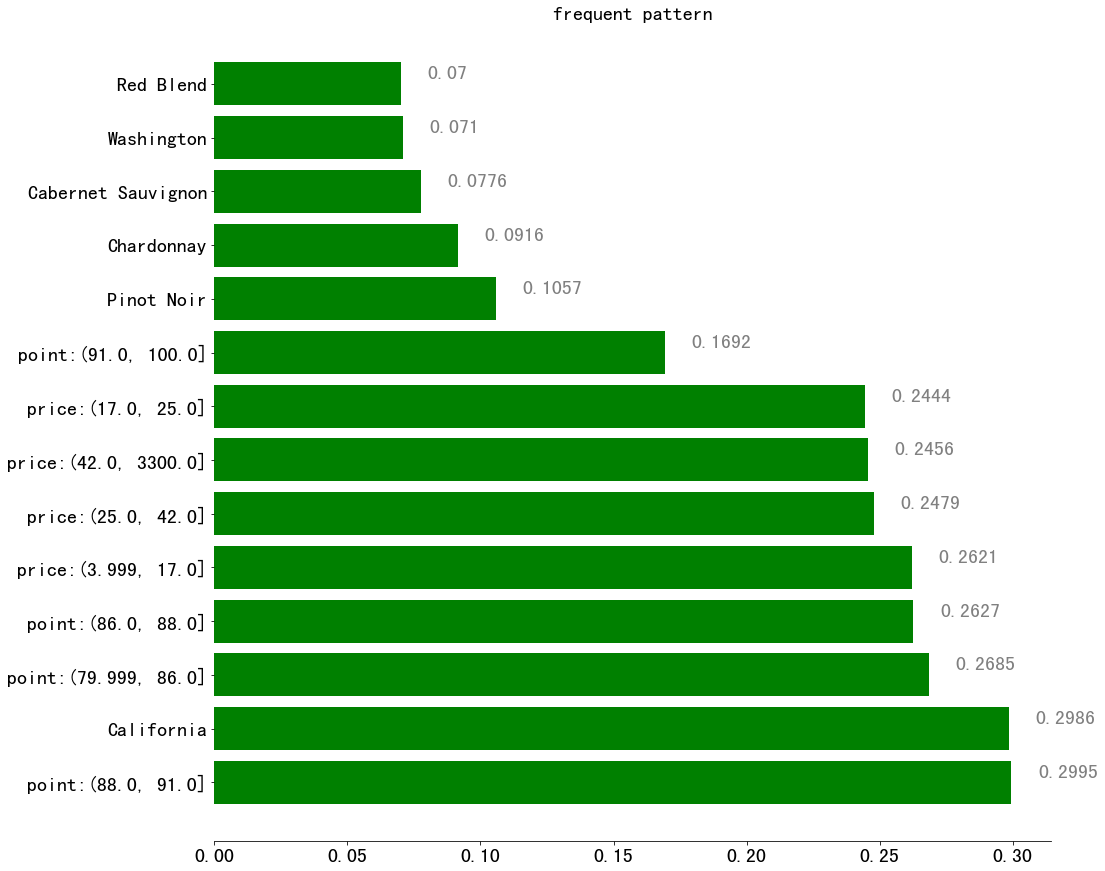

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
colors = ['g' for i in range(len(result_2_1.index))]
ax.barh(y=linkstr_1,width=result_2_1.support, color = colors)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('frequent pattern',fontsize = 20)
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False) 

for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5, 
             str(round((i.get_width()), 4)), 
             fontsize=20, fontweight='bold', 
             color='grey')
plt.show()

# 3导出关联规则，计算其支持度和置信度

In [18]:

from mlxtend.frequent_patterns import association_rules
 
association_rule = association_rules(result,metric='lift')	# metric可以有很多的度量选项，返回的表列名都可以作为参数
association_rule.sort_values(by='confidence',ascending=False,inplace=True) 

In [20]:
link = [list(x) for x in association_rule.antecedents]
link_1 = [list(x) for x in association_rule.consequents]
link_2 = []
for i in range(len(association_rule.index)):
    link_2.append(link[i][0]+" -> "+link_1[i][0])
link_2

['point:(91.0, 100.0] -> price:(42.0, 3300.0]',
 'price:(3.999, 17.0] -> point:(79.999, 86.0]',
 'point:(79.999, 86.0] -> price:(3.999, 17.0]',
 'Pinot Noir -> California',
 'Pinot Noir -> price:(42.0, 3300.0]',
 'price:(42.0, 3300.0] -> point:(91.0, 100.0]',
 'price:(25.0, 42.0] -> point:(88.0, 91.0]',
 'price:(42.0, 3300.0] -> California',
 'price:(25.0, 42.0] -> California',
 'point:(91.0, 100.0] -> California',
 'price:(42.0, 3300.0] -> point:(88.0, 91.0]',
 'price:(17.0, 25.0] -> point:(86.0, 88.0]',
 'point:(88.0, 91.0] -> price:(25.0, 42.0]',
 'price:(17.0, 25.0] -> point:(88.0, 91.0]',
 'point:(86.0, 88.0] -> price:(17.0, 25.0]',
 'California -> price:(25.0, 42.0]',
 'California -> price:(42.0, 3300.0]',
 'price:(3.999, 17.0] -> point:(86.0, 88.0]',
 'point:(86.0, 88.0] -> price:(3.999, 17.0]',
 'point:(79.999, 86.0] -> California',
 'California -> point:(88.0, 91.0]',
 'point:(88.0, 91.0] -> California',
 'point:(88.0, 91.0] -> price:(42.0, 3300.0]',
 'price:(17.0, 25.0] -> po

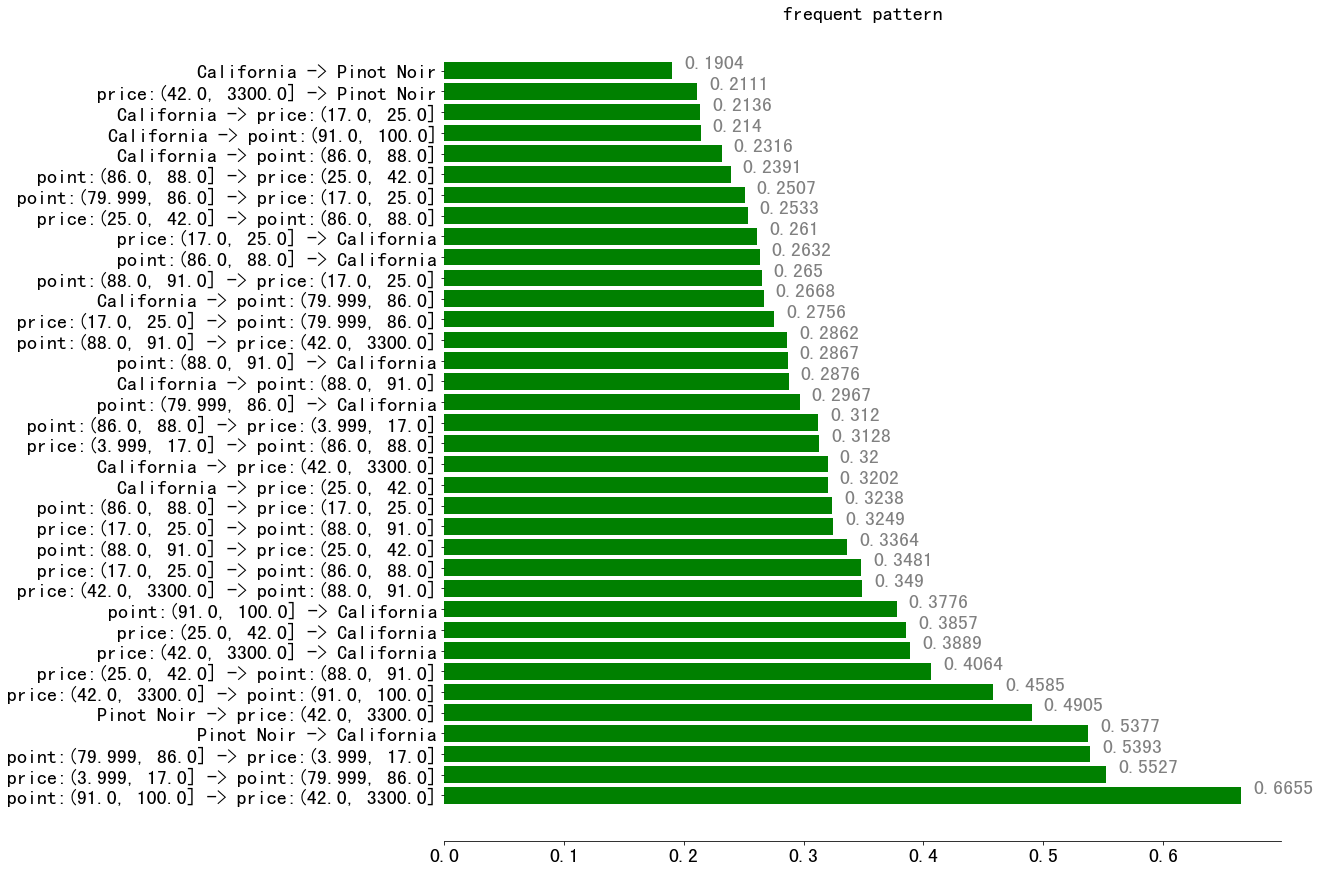

In [21]:
fig, ax = plt.subplots(figsize=(15, 15))
colors = ['g' for i in range(len(association_rule.index))]
ax.barh(y=link_2,width=association_rule.confidence, color = colors)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('frequent pattern',fontsize = 20)
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False) 

for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5, 
             str(round((i.get_width()), 4)), 
             fontsize=20, fontweight='bold', 
             color='grey')
plt.show()

# 4对规则进行评价

In [22]:
association_rule.sort_values(by='leverage',ascending=False,inplace=True) 

In [24]:
#IR，inbalance ratio,Kulc
#item,Kulc,IR
IR = []
linkitem = []
linka = [x for x in association_rule["antecedent support"]]
linkb = [x for x in association_rule["consequent support"]]
linkab = [x for x in association_rule["support"]]
link = [list(x) for x in association_rule.antecedents]
link_1 = [list(x) for x in association_rule.consequents]
linkitem = []
for i in range(len(association_rule.index)):
    linkitem.append([link[i][0],link_1[i][0]])

for i in range(0,len(association_rule.index),2):
               IR.append([linkitem[i],(association_rule.confidence[i]+association_rule.confidence[i+1])/2,
                          abs(linka[i]-linkb[i])/(linka[i]+linkb[i]-linkab[i])])
def takeSecond(elem):
    return elem[1]
IR.sort(key = takeSecond) 
L_i = [str(i[0]) for i in IR]
L_k= [i[1] for i in IR]
L_IR = [i[2] for i in IR]

In [25]:
L_i

["['price:(25.0, 42.0]', 'point:(86.0, 88.0]']",
 "['California', 'point:(88.0, 91.0]']",
 "['price:(17.0, 25.0]', 'point:(88.0, 91.0]']",
 "['point:(79.999, 86.0]', 'price:(17.0, 25.0]']",
 "['point:(86.0, 88.0]', 'price:(3.999, 17.0]']",
 "['price:(42.0, 3300.0]', 'California']",
 "['point:(88.0, 91.0]', 'price:(42.0, 3300.0]']",
 "['point:(79.999, 86.0]', 'California']",
 "['point:(91.0, 100.0]', 'California']",
 "['price:(25.0, 42.0]', 'California']",
 "['price:(17.0, 25.0]', 'point:(86.0, 88.0]']",
 "['point:(86.0, 88.0]', 'California']",
 "['price:(42.0, 3300.0]', 'Pinot Noir']",
 "['California', 'Pinot Noir']",
 "['California', 'price:(17.0, 25.0]']",
 "['point:(88.0, 91.0]', 'price:(25.0, 42.0]']",
 "['point:(79.999, 86.0]', 'price:(3.999, 17.0]']",
 "['point:(91.0, 100.0]', 'price:(42.0, 3300.0]']"]

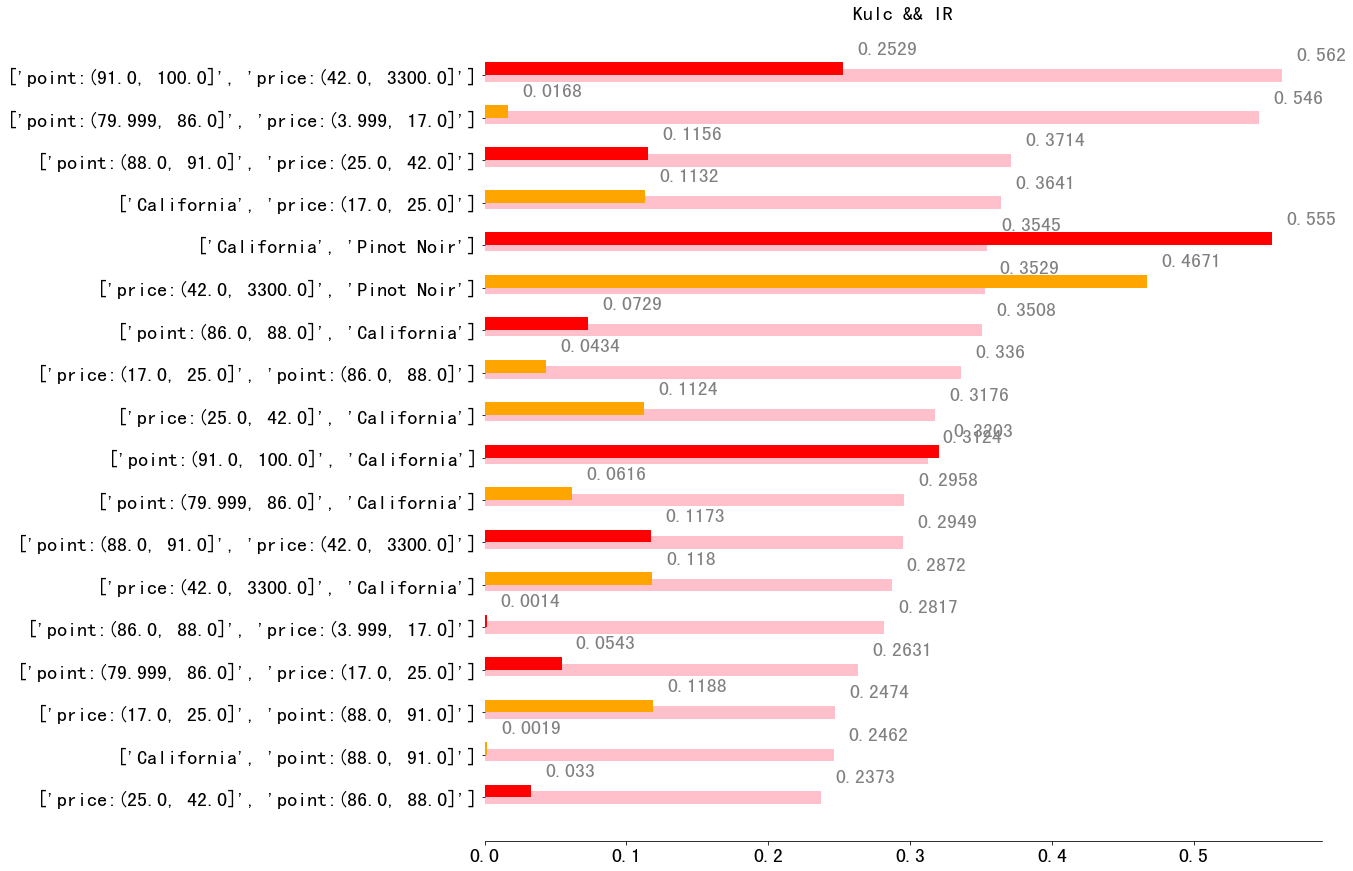

In [26]:
fig, ax = plt.subplots(figsize=(15, 15))
colors = ['pink' for i in range(len(IR))]
colors_I = []
for i in range(len(linka)):
    if linka[i]>linkb[i]:
        colors_I.append('r')
    else:
        colors_I.append('orange')
ax.barh(y=L_i,width=L_k, color = colors,height = 0.3)
ax.barh(y=L_i,width=L_IR, color = colors_I,height = 0.3,align = "edge")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Kulc && IR',fontsize = 20)
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False) 
handles, labels = ax.get_legend_handles_labels()


for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5, 
             str(round((i.get_width()), 4)), 
             fontsize=20, fontweight='bold', 
             color='grey')

#红橙色代表IR，粉红色代表Kulc值
plt.show()

Kulc与IR图中，粉色为Kulc值，趋向1为正相关，趋向0为负相关，趋向0.5为无关。
红色或橙色为IR值，该值越高，代表某一方向指向另一方向的趋势更倾向于单向，红色为前者，橙色为后者

In [31]:
cos = []

for i in range(0,len(association_rule.index),2):
               cos.append([linkitem[i],math.sqrt(association_rule.confidence[i]*association_rule.confidence[i+1])])
def takeSecond(elem):
    return elem[1]
cos.sort(key = takeSecond) 
L_i = [str(i[0]) for i in cos]
L_cos= [i[1] for i in cos]

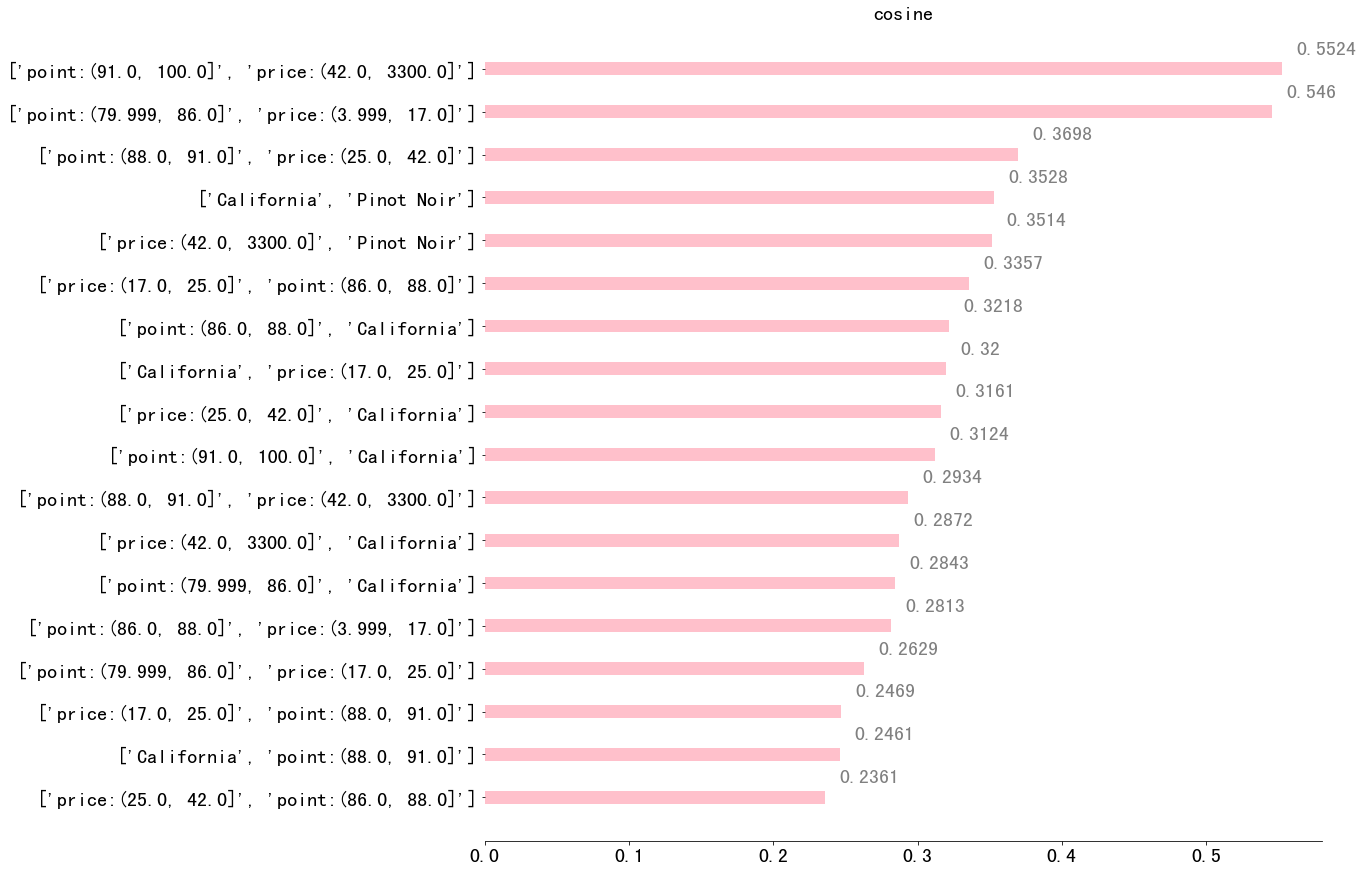

In [33]:
fig, ax = plt.subplots(figsize=(15, 15))
colors = ['pink' for i in range(len(cos))]
ax.barh(y=L_i,width=L_cos, color = colors,height = 0.3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('cosine',fontsize = 20)
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False) 
handles, labels = ax.get_legend_handles_labels()


for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5, 
             str(round((i.get_width()), 4)), 
             fontsize=20, fontweight='bold', 
             color='grey')

#红橙色代表IR，粉红色代表Kulc值
plt.show()

# 5挖掘结果分析

    由以上结果我们可以知道，高价酒（价格大于42美元的酒）与高评分（评分大于91分）有着一定的正相关性，但由IR可知，这个一定程度上倾向于单向的“评高分的酒更有可能是高价酒”，不过由于平衡系数不够高，这一点并不明显。
    相对应的，低价酒(价格小于17美元的酒)与低评分（评分小于86分）有着一定的正相关性，且二者之间无明显的偏向关系。